Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,datasets,layers, callbacks
import matplotlib.pyplot as plt
import matplotlib.image as mp
from keras.layers import BatchNormalization, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

Loading Dataset for Training

In [ ]:
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.3,
zoom_range=0.2,
horizontal_flip=True)

training_set=train_datagen.flow_from_directory(
'/content/drive/MyDrive/Colab Notebooks/flower_photos/Train',
target_size=(64,64),
batch_size=50,
class_mode='categorical')

Found 2500 images belonging to 5 classes.


Loading Dataset for Testing

In [ ]:
test_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.3,
zoom_range=0.2,
horizontal_flip=True)
test_set=train_datagen.flow_from_directory(
'/content/drive/MyDrive/Colab Notebooks/flower_photos/Test',
target_size=(64,64),
batch_size=50,
class_mode='categorical')

Found 500 images belonging to 5 classes.


In [ ]:
training_set[0][0][0].shape

(64, 64, 3)

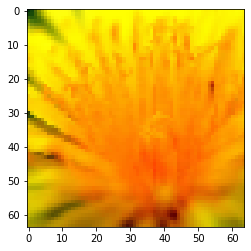

In [ ]:
plt.imshow(training_set[0][0][0])

Building CNN Model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1,1), activation='relu',))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(5 , activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 10)         0

Adding Optimizer

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

Training the model

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=5)
history=model.fit(x = training_set , validation_data = test_set , epochs = 5, callbacks=[early_stopping])

Epoch 1/5
50/50 [==============================] - 666s 13s/step - loss: 1.5288 - accuracy: 0.2980 - val_loss: 1.4467 - val_accuracy: 0.3380
Epoch 2/5
50/50 [==============================] - 21s 429ms/step - loss: 1.3012 - accuracy: 0.4440 - val_loss: 1.2716 - val_accuracy: 0.4980
Epoch 3/5
50/50 [==============================] - 22s 433ms/step - loss: 1.1659 - accuracy: 0.5160 - val_loss: 1.1775 - val_accuracy: 0.5060
Epoch 4/5
50/50 [==============================] - 22s 439ms/step - loss: 1.0868 - accuracy: 0.5468 - val_loss: 1.2023 - val_accuracy: 0.5240
Epoch 5/5
50/50 [==============================] - 22s 440ms/step - loss: 1.0524 - accuracy: 0.5748 - val_loss: 1.1419 - val_accuracy: 0.5320


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Ploting Accuracy Graph 

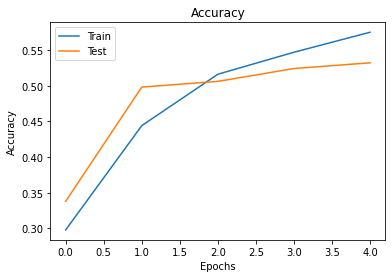

In [ ]:
plt.plot(history.history ["accuracy"])
plt.plot(history.history ["val_accuracy"])
plt.legend (["Train", "Test"], loc="upper left")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Ploting Loss Graph

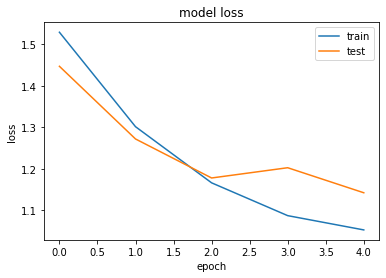

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

Example

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Sunflower.jpg')

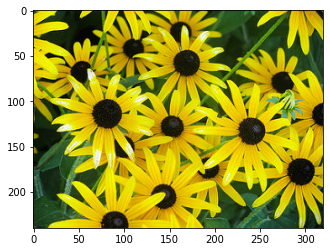

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Sunflower.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
result

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
if result[0][0]==1:
  print('Daisy')
elif result[0][1]==1:
  print('Dandelion')
elif result[0][2]==1:
  print('Rose')
elif result[0][3]==1:
  print('Sunflower')
else :
  print("Tulip")

Sunflower
